In [1]:
from neural_network import MLP, CNN
from jax import random
import jax.numpy as jnp

key = random.key(42)

# Multi Level Perceptron (MLP)

In [2]:
model = MLP(layer_sizes=[4,6,4,5])

subkey, key = random.split(key)
params = model.init(subkey)

model.apply(params, jnp.array([[2.2,5.1,1.6,6.2],[2.2,5.5,1.6,6.2]]))

Input vector of size 4
to vector of size 6
to vector of size 4
to vector of size 5


Array([[ 1.7111232 ,  3.373485  ,  0.6726889 , -0.26877403,  0.1448667 ],
       [ 1.7924013 ,  3.6350818 ,  0.7425479 , -0.36859792,  0.00809073]],      dtype=float32)

# Convolutional Neural Netwrok (CNN)

In [3]:
import matplotlib.pyplot as plt

def show_img(
    img: jnp.ndarray, # shape = (num_filters, in_channels, kernel_size, kernel_size)
):
    num_filters, in_channels, kernel_height, kernel_width = img.shape
    fig, ax = plt.subplots(nrows=num_filters, ncols=in_channels, sharex=True, sharey=True)
    if num_filters == 1:
        ax = [ax]
    if in_channels == 1:
        ax = [[a] for a in ax]
    for row in range(num_filters):
        for col in range(in_channels):
            m = ax[row][col].imshow(img[row,col])
    plt.show()

Input image of size 5 by 5 with 3 channels
to mage of size 3 by 3 with 1 channels
reshaped to vector of size 9
to vector of size 5
to vector of size 1


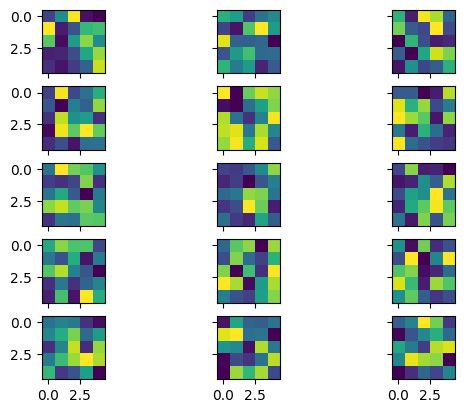

Array([[-1.7399174],
       [-1.8115835],
       [-2.325652 ],
       [-2.142899 ],
       [-2.3458943]], dtype=float32)

In [4]:
model = CNN(input_shape=(3,5,5), conv_layers=[(1,3,1)], fc_layers=[5,1])

subkey, key = random.split(key)
params = model.init(subkey)

batch_size = 5
channels = 3
img = random.uniform(subkey, shape=(batch_size, channels, 5, 5))
show_img(img)

model.apply(params, img)